# Hypothesis: I think that the first 50 people to respond to the COMP 110 survey started the class with none to less than one month of programming experience.  

## Before I start any actual coding, I will enable autoreload

In [143]:
%reload_ext autoreload
%autoreload 2

## First, I will read the csv and convert it to a column-oriented data table. 

In [144]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)


## Now, I will take away all of the data that isn't the first 50 respondants and store it into a new dictionary.

In [145]:

from data_utils import helper
new_columns: dict[str, list[str]] = helper(columns, 50)


## Now, I will select the row that asks students how much programming experience they have (for both the full list and the list with only 50 participants).

In [146]:
from data_utils import head, select
subset: dict[str, list[str]] = select(columns, ["prior_time"])
new_subset: dict[str, list[str]] = select(new_columns, ["prior_time"])

## The possible answers to this question was: None to less than one month, 1 month or so, 2-6 months, 7-12 months, 1-2 years, > 2 years. I will now count up the totals number of responses for each, and filter out the empty data.

In [147]:
from data_utils import count
counts = count(subset['prior_time'])
counts.pop("")

print("For the total responses only!")
print(f"None to less than one month total: {counts['None to less than one month!']} ")
print(f"1 month or so total: {counts['1 month or so']} ")
print(f"2-6 months total: {counts['2-6 months']} ")
print(f"7-12 months total: {counts['7-12 months']} ")
print(f"1-2 years total: {counts['1-2 years']} ")
print(f"> 2 years total: {counts['> 2 years']} ")
print(counts)

For the total responses only!
None to less than one month total: 81 
1 month or so total: 43 
2-6 months total: 30 
7-12 months total: 9 
1-2 years total: 4 
> 2 years total: 3 
{'None to less than one month!': 81, '1 month or so': 43, '7-12 months': 9, '1-2 years': 4, '2-6 months': 30, '> 2 years': 3}


## I will do the same for the first fifty responses only.

In [148]:
from data_utils import count
new_counts = count(new_subset["prior_time"])
new_counts.pop("")

print("For the first fifty responses only!")
print(f"None to less than one month total: {new_counts['None to less than one month!']} ")
print(f"1 month or so total: {new_counts['1 month or so']} ")
print(f"2-6 months total: 0")
print(f"7-12 months total: {new_counts['7-12 months']} ")
print(f"1-2 years total: 0")
print(f"> 2 years total: 0")
print(new_counts)

For the first fifty responses only!
None to less than one month total: 4 
1 month or so total: 3 
2-6 months total: 0
7-12 months total: 1 
1-2 years total: 0
> 2 years total: 0
{'None to less than one month!': 4, '1 month or so': 3, '7-12 months': 1}


## Here is a visual showing the distribution of this data for the total responses vs. the first fifty.

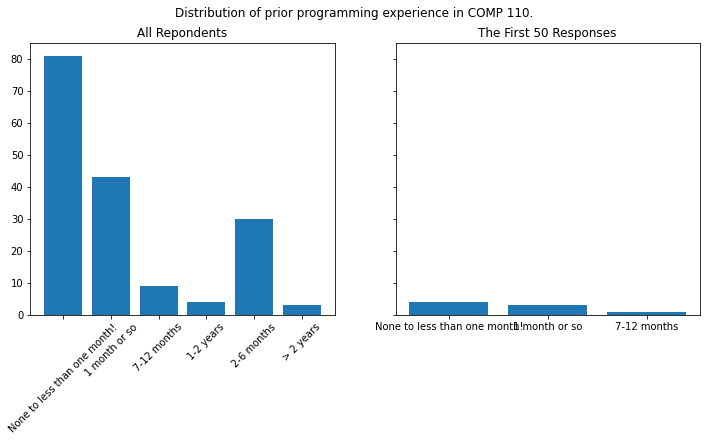

In [152]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Distribution of prior programming experience in COMP 110.")


axes[0].set_title("All Repondents")
axes[0].bar(counts.keys(), counts.values())
axes[0].tick_params(axis='x', labelrotation = 45)

axes[1].set_title("The First 50 Responses")
axes[1].bar(new_counts.keys(), new_counts.values())
axes[0].tick_params(axis='x', labelrotation = 45)

## Conclusion

### In conclusion, most of the first 50 responders had none to less than one month of prior programming experience. This means that my hypothesis was true. 

### This makes sense, because COMP 110 teaches you about python from the bottom up, and if you already have some formal training, you could probably place out of it. Also, this class is a major requirement for mnay majors unrelated to programming.

### This effect is more extreme when looking at the data table for the total reponses. This makes sense because the more responses you have, the more you'll average out to the population mean. So this supports the fact that most students in COMP 110 had none to less than one month of prior pogramming experience, which was half of my hypothesis. 

### This could also hint at the fact that the students who are prepared/ready to work faster earlier in the semester (those who completed the survey first) are more likely to have prior COMP experience. This is just a weak correlation though, and does not mean anything in the context of this anlysis. It is just me throwing ideas around.  